Most of the newspapers in the world are using the raw numbers of infected people in each country to make a cross country comparison. However, is it a good measure? To answer this question in this project we will focus on the following questions Does the number of countries with most infected correlates to the number of countries with most infected per million?



In [235]:
import pandas as pd
covid=pd.read_csv('owid-covid-data.csv')
import seaborn as sns
import matplotlib.pyplot as plt

**Checking Data**

In [236]:
covid.info()
covid.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26119 entries, 0 to 26118
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         26055 non-null  object 
 1   continent                        25877 non-null  object 
 2   location                         26119 non-null  object 
 3   date                             26119 non-null  object 
 4   total_cases                      25904 non-null  float64
 5   new_cases                        25904 non-null  float64
 6   total_deaths                     25904 non-null  float64
 7   new_deaths                       25904 non-null  float64
 8   total_cases_per_million          25840 non-null  float64
 9   new_cases_per_million            25840 non-null  float64
 10  total_deaths_per_million         25840 non-null  float64
 11  new_deaths_per_million           25840 non-null  float64
 12  total_tests       

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [237]:
covid.isnull().sum()

iso_code                              64
continent                            242
location                               0
date                                   0
total_cases                          215
new_cases                            215
total_deaths                         215
new_deaths                           215
total_cases_per_million              279
new_cases_per_million                279
total_deaths_per_million             279
new_deaths_per_million               279
total_tests                        18626
new_tests                          19298
total_tests_per_thousand           18626
new_tests_per_thousand             19298
new_tests_smoothed                 18021
new_tests_smoothed_per_thousand    18021
tests_units                        17401
stringency_index                    5050
population                            64
population_density                  1132
median_age                          2511
aged_65_older                       2844
aged_70_older   

After a brief check on the variables we don't have any clear problem with the data, there is no missing country name or date. For the variables about the number of cases, it is expected to have missing values because it considers when the first case occurred in each country.

To answer our question about total cases vs total caser per million we need to have a look on the last day. So we will check if is there is missing data for the last day of the event later on

In [238]:
covid.date.max()# select the last day of the database

'2020-06-25'

In [249]:
covid.duplicated().sum()# sum of duplicated values

0

Now we need to check is there is missing data for the last day because that's the data that matters for our analysis

In [240]:
#selecting last day
covid_last_day=covid[(covid['date']=='2020-06-24') & (covid['location']!='World')]
covid_last_day.isnull().sum()


iso_code                             0
continent                            0
location                             0
date                                 0
total_cases                          0
new_cases                            0
total_deaths                         0
new_deaths                           0
total_cases_per_million              0
new_cases_per_million                0
total_deaths_per_million             0
new_deaths_per_million               0
total_tests                        153
new_tests                          157
total_tests_per_thousand           153
new_tests_per_thousand             157
new_tests_smoothed                 149
new_tests_smoothed_per_thousand    149
tests_units                        149
stringency_index                   178
population                           0
population_density                  11
median_age                          24
aged_65_older                       27
aged_70_older                       25
gdp_per_capita           

In [241]:
covid_last_day.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
166,AFG,Asia,Afghanistan,2020-06-24,29481.0,338.0,618.0,20.0,757.315,8.683,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83
275,ALB,Europe,Albania,2020-06-24,2047.0,52.0,45.0,1.0,711.307,18.069,...,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57
448,DZA,Africa,Algeria,2020-06-24,12076.0,156.0,861.0,9.0,275.387,3.557,...,3.857,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88
552,AND,Europe,Andorra,2020-06-24,855.0,0.0,52.0,0.0,11065.812,0.000,...,NaN,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73
648,AGO,Africa,Angola,2020-06-24,186.0,3.0,10.0,1.0,5.659,0.091,...,1.362,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15


We don't have any duplicated values, so our data is ready for our first analysis.

**Analysis**

In this analysis we only are going to consider one day before the last day of our database 2020-06-24

In [242]:
#Function to sort according to the parameter and make a graph of the top 10
def ranking(parameter):# take the column as parameter
    result=covid_last_day.sort_values(by=parameter,ascending=False) #sort the values 
    result=result.iloc[0:11]#select first 10
    sns.barplot(y=result['location'],x=result[parameter],orient='h')#plot the barplot  
    

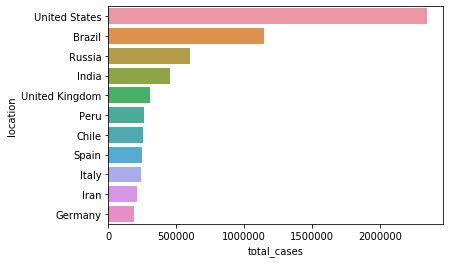

In [243]:
ranking('total_cases')

That's the most common representation worldwide, considering the raw number of infected people, but does it reflect the reality? can we make a cross country comparison based on raw numbers? Does it not lead to bias?

Countries around the world have many differences among them. One of the main ones is the population size. So, why not to check considering the population size? In our database, we have the number of cases per million. Let's check it.

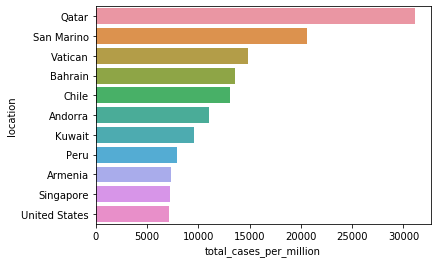

In [244]:
ranking('total_cases_per_million')


Now we see that using Total cases and Total cases per million we have a  different ranking. However, countries that are in both graphics are more likely to be in a worse situation e.g Chile and the United States

At first, sight, considering the number per million seems to be a good indicator, but we need further analysis to confirm it. So let's try to think of some variables that could affect this variable. A good candidate could the number of people tested. Because a population might have many infected people who do not know it. So it is worth to compare the number of tests.s

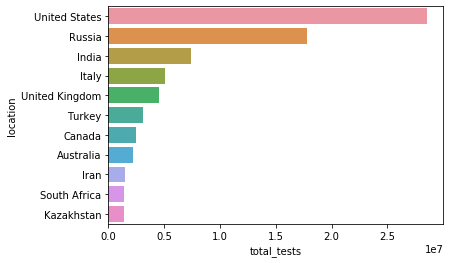

In [245]:
ranking('total_tests')


We can see that from the countries which most tested, in raw numbers only The United states appears on the Top 10 of the raw number of total cases and total cases per million. However, testing not considering population size leads us to another bias. so Let's check the number of tests per thousand

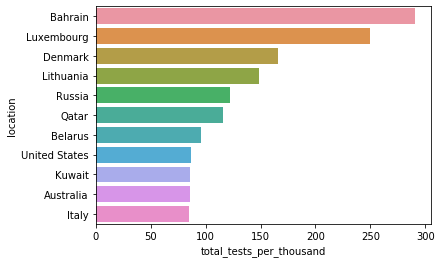

In [246]:
ranking('total_tests_per_thousand')

I don't have an Epidemiology education, so my comments are here limited to what the data tells. So the first thing is that most of the countries that are on the top 10 rankings of testing per thousand are not on the graphs of total cases and total cases per million. So there is might be a correlation that we are going to check later. 